<a href="https://colab.research.google.com/github/Eunjung-Cho/Project/blob/master/webnovel/%EC%B9%B4%EC%B9%B4%EC%98%A4%ED%8E%98%EC%9D%B4%EC%A7%80_%EA%B4%80%EB%A0%A8_%ED%8A%B8%EC%9C%84%ED%84%B0_%ED%85%8D%EC%8A%A4%ED%8A%B8_%EB%B6%84%EC%84%9D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 필요한 라이브러리


In [1]:
# 한글 폰트 다운 하고 런타임 다시 시작
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
fonts-nanum is already the newest version (20170925-1).
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'sudo apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 40 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 10 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/var/cache/fontconfig: cleaning cache directory
/root/.cache/fontconfig: not cleaning non-existent

In [2]:
!pip install tweepy

In [3]:
# 패키지 설치 확인
import tweepy

In [4]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

주피터노트북으로 할 경우 pip install beautifulsoup4, pip install lxml 하기

#### api 토큰 인증

bearer 토큰: AAAAAAAAAAAAAAAAAAAAANtOSwEAAAAAtVvdZWGN50Z27FvJ0qb%2B9pnyZLE%3DyCkpSd4dGqApNrqhYHW1thYS0qN6pPionbbvouaRJQo6Uw1r3b

In [5]:
# 발급 완료된 키 입력하기
CONSUMER_KEY = "eGT1RlXCfGjVjlzXOAzJTLwme"
CONSUMER_SECRET ="HbrgQUUdmtMwpXZIhi9cxOmKzWdLPf5D7fGJaF4O3FaB6teEhz"
ACCESS_TOKEN_KEY = "49965905-i58ERZY5aUzTJh3Da9uJZFHjYpbqNJU9pm2qpBABx"
ACCESS_TOKEN_SECRET = "5P6243Mel4pbJ3hqRzty4LfExOvybfYByiAGyrximJp1a"

#개인정보 인증을 요청하는 Handler
auth = tweepy.OAuthHandler(CONSUMER_KEY, CONSUMER_SECRET)

#인증 요청 수락하기
auth.set_access_token(ACCESS_TOKEN_KEY, ACCESS_TOKEN_SECRET)

# 트위터 API를 사용하기 위한 준비
api = tweepy.API(auth)

In [6]:
# 크롤링하고 싶은 키워드 입력하기
keyword = "카카오페이지"

In [7]:
tweets = api.search(keyword)
for tweet in tweets:
    print(tweet.text)
    print(tweet.entities['user_mentions'])
    print(tweet.entities['hashtags'])
    print(tweet.created_at)

RT @monday_milo: 식물을 키우는 일상을 그린 저의 신작 웹툰 &lt;크레이지 가드너&gt;가  카카오페이지에서 연재를 시작했습니다! 잘부탁드립니다.💚💚💚💚💚
https://t.co/pc6kjZXGJq https://t.co/FboI1MFAZ4
[{'screen_name': 'monday_milo', 'name': '마일로', 'id': 287599881, 'id_str': '287599881', 'indices': [3, 15]}]
[]
2021-08-19 06:38:17
RT @monday_milo: 식물을 키우는 일상을 그린 저의 신작 웹툰 &lt;크레이지 가드너&gt;가  카카오페이지에서 연재를 시작했습니다! 잘부탁드립니다.💚💚💚💚💚
https://t.co/pc6kjZXGJq https://t.co/FboI1MFAZ4
[{'screen_name': 'monday_milo', 'name': '마일로', 'id': 287599881, 'id_str': '287599881', 'indices': [3, 15]}]
[]
2021-08-19 06:38:05
시리즈에 이은 카카페 런칭~
&lt;츤데레의 정석&gt; 카카페에서도 많은 사랑 받으시길 응원합니다 🙏👏🍀
.
.
#윤소다작가님
#츤데레의정석
#카카오페이지
#이겸이
#유미
#많은사랑
#받으세요 https://t.co/kcjx2HGz8j
[]
[{'text': '윤소다작가님', 'indices': [64, 71]}, {'text': '츤데레의정석', 'indices': [72, 79]}, {'text': '카카오페이지', 'indices': [80, 87]}, {'text': '이겸이', 'indices': [88, 92]}, {'text': '유미', 'indices': [93, 96]}, {'text': '많은사랑', 'indices': [97, 102]}, {'text': '받으세요', 'indices': [103, 108]}]
2021-08-19 06:37:39
RT @zziho_: ✨카카오

### 데이터 프레임 형태로 수집

In [8]:
# 크롤링된 데이터를 저장할 데이터 프레임입니다.
columns = ['created', 'tweet_text']
df = pd.DataFrame(columns=columns)

# 크롤링을 수행할 갯수(여기서는 1000개)를 입력하고, Cursor 객체를 사용하여 크롤링을 수행합니다.
max_tweets = 1000
searched_tweets = [status for status in tweepy.Cursor(api.search, q=keyword).items(max_tweets)]

# ‘카카오페이지’가 포함된 1000개의 트윗들에서, ‘text’, ‘created_at’ 정보를 데이터 프레임으로 저장합니다.
for tweet in searched_tweets:
    tweet_json = tweet._json
    tweet_text = tweet_json['text']
    created = tweet_json['created_at']
    row = [created, tweet_text]
    series = pd.Series(row, index=df.columns)
    df = df.append(series, ignore_index=True)

In [9]:
# 위의 데이터를 csv 로 저장
df.to_csv("tweet_temp.csv", index=False)

# 키워드 추출 하기

## 텍스트 데이터 전처리 하기

In [10]:
df = pd.read_csv("tweet_temp.csv")
df.head()

,created,tweet_text
0,Thu Aug 19 06:38:17 +0000 2021,RT @monday_milo: 식물을 키우는 일상을 그린 저의 신작 웹툰 &lt;크...
1,Thu Aug 19 06:38:05 +0000 2021,RT @monday_milo: 식물을 키우는 일상을 그린 저의 신작 웹툰 &lt;크...
2,Thu Aug 19 06:37:39 +0000 2021,시리즈에 이은 카카페 런칭~\n&lt;츤데레의 정석&gt; 카카페에서도 많은 사랑 ...
3,Thu Aug 19 06:37:29 +0000 2021,RT @zziho_: ✨카카오페이지에서 &lt;우선 남동생부터 숨기자&gt;의 작화...
4,Thu Aug 19 06:36:23 +0000 2021,RT @toonplus_1: ✨&lt;욕망으로 물든 밤&gt;카카오페이지 기다무 런...


In [11]:
import re

# 텍스트 정제 함수 : 한글 이외의 문자는 전부 제거합니다.
def text_cleaning(text):
    hangul = re.compile('[^ ㄱ-ㅣ가-힣]+') # 한글의 정규표현식을 나타냅니다.
    result = hangul.sub('', text)
    return result

In [12]:
# ‘tweet_text’ 피처에 이를 적용합니다.
df['ko_text'] = df['tweet_text'].apply(lambda x: text_cleaning(x))
df.head()

,created,tweet_text,ko_text
0,Thu Aug 19 06:38:17 +0000 2021,RT @monday_milo: 식물을 키우는 일상을 그린 저의 신작 웹툰 &lt;크...,식물을 키우는 일상을 그린 저의 신작 웹툰 크레이지 가드너가 카카오페이지에서 ...
1,Thu Aug 19 06:38:05 +0000 2021,RT @monday_milo: 식물을 키우는 일상을 그린 저의 신작 웹툰 &lt;크...,식물을 키우는 일상을 그린 저의 신작 웹툰 크레이지 가드너가 카카오페이지에서 ...
2,Thu Aug 19 06:37:39 +0000 2021,시리즈에 이은 카카페 런칭~\n&lt;츤데레의 정석&gt; 카카페에서도 많은 사랑 ...,시리즈에 이은 카카페 런칭츤데레의 정석 카카페에서도 많은 사랑 받으시길 응원합니다 ...
3,Thu Aug 19 06:37:29 +0000 2021,RT @zziho_: ✨카카오페이지에서 &lt;우선 남동생부터 숨기자&gt;의 작화...,카카오페이지에서 우선 남동생부터 숨기자의 작화 담당을 맡게 되었습니다 오랜 기간...
4,Thu Aug 19 06:36:23 +0000 2021,RT @toonplus_1: ✨&lt;욕망으로 물든 밤&gt;카카오페이지 기다무 런...,욕망으로 물든 밤카카오페이지 기다무 런칭계약결혼 갑을관계 소유욕 상처녀 카카오페...


## konlpy 를 이용한 키워드 추출 

In [13]:
!pip install konlpy

In [14]:
from konlpy.tag import Okt
from collections import Counter

# 한국어 약식 불용어사전 예시 파일입니다. 출처 - (https://www.ranks.nl/stopwords/korean)
korean_stopwords_path = "/content/korean_stopwords.txt"
with open(korean_stopwords_path, encoding='utf8') as f:
    stopwords = f.readlines()
stopwords = [x.strip() for x in stopwords]

def get_nouns(x):
    nouns_tagger = Okt()
    nouns = nouns_tagger.nouns(x)
    
    # 한글자 키워드를 제거합니다.
    nouns = [noun for noun in nouns if len(noun) > 1]
    
    # 불용어를 제거합니다.
    nouns = [noun for noun in nouns if noun not in stopwords]
    
    return nouns

In [15]:
# ‘ko_text’ 피처에 이를 적용합니다.
df['nouns'] = df['ko_text'].apply(lambda x: get_nouns(x))
print(df.shape)
df.head()

(1000, 4)


,created,tweet_text,ko_text,nouns
0,Thu Aug 19 06:38:17 +0000 2021,RT @monday_milo: 식물을 키우는 일상을 그린 저의 신작 웹툰 &lt;크...,식물을 키우는 일상을 그린 저의 신작 웹툰 크레이지 가드너가 카카오페이지에서 ...,"[식물, 일상, 그린, 신작, 웹툰, 크레이지, 가드, 카카오페이지, 연재, 시작]"
1,Thu Aug 19 06:38:05 +0000 2021,RT @monday_milo: 식물을 키우는 일상을 그린 저의 신작 웹툰 &lt;크...,식물을 키우는 일상을 그린 저의 신작 웹툰 크레이지 가드너가 카카오페이지에서 ...,"[식물, 일상, 그린, 신작, 웹툰, 크레이지, 가드, 카카오페이지, 연재, 시작]"
2,Thu Aug 19 06:37:39 +0000 2021,시리즈에 이은 카카페 런칭~\n&lt;츤데레의 정석&gt; 카카페에서도 많은 사랑 ...,시리즈에 이은 카카페 런칭츤데레의 정석 카카페에서도 많은 사랑 받으시길 응원합니다 ...,"[시리즈, 카페, 런칭, 츤데레, 정석, 카페, 사랑, 응원, 윤소, 작가, 츤데레..."
3,Thu Aug 19 06:37:29 +0000 2021,RT @zziho_: ✨카카오페이지에서 &lt;우선 남동생부터 숨기자&gt;의 작화...,카카오페이지에서 우선 남동생부터 숨기자의 작화 담당을 맡게 되었습니다 오랜 기간...,"[카카오페이지, 남동생, 숨기, 작화, 담당, 기간, 작품, 준비]"
4,Thu Aug 19 06:36:23 +0000 2021,RT @toonplus_1: ✨&lt;욕망으로 물든 밤&gt;카카오페이지 기다무 런...,욕망으로 물든 밤카카오페이지 기다무 런칭계약결혼 갑을관계 소유욕 상처녀 카카오페...,"[욕망, 물든, 카카오페이지, 런칭, 계약, 결혼, 관계, 소유, 상처, 카카오페이..."


# 연관 분석을 이용한 키워드 분석

In [16]:
!pip install apriori apyori

In [17]:
from apyori import apriori

# 장바구니 형태의 데이터(트랜잭션 데이터)를 생성합니다.
transactions = [
    ['카카오페이지', '웹툰'],
    ['카카오페이지', '웹소설'],
    ['카카오페이지', '웹툰', '웹소설']
]

# 연관 분석을 수행합니다.
results = list(apriori(transactions))
for result in results:
    print(result)

RelationRecord(items=frozenset({'웹소설'}), support=0.6666666666666666, ordered_statistics=[OrderedStatistic(items_base=frozenset(), items_add=frozenset({'웹소설'}), confidence=0.6666666666666666, lift=1.0)])
RelationRecord(items=frozenset({'웹툰'}), support=0.6666666666666666, ordered_statistics=[OrderedStatistic(items_base=frozenset(), items_add=frozenset({'웹툰'}), confidence=0.6666666666666666, lift=1.0)])
RelationRecord(items=frozenset({'카카오페이지'}), support=1.0, ordered_statistics=[OrderedStatistic(items_base=frozenset(), items_add=frozenset({'카카오페이지'}), confidence=1.0, lift=1.0)])
RelationRecord(items=frozenset({'웹소설', '웹툰'}), support=0.3333333333333333, ordered_statistics=[OrderedStatistic(items_base=frozenset(), items_add=frozenset({'웹소설', '웹툰'}), confidence=0.3333333333333333, lift=1.0), OrderedStatistic(items_base=frozenset({'웹소설'}), items_add=frozenset({'웹툰'}), confidence=0.5, lift=0.75), OrderedStatistic(items_base=frozenset({'웹툰'}), items_add=frozenset({'웹소설'}), confidence=0.5, lift=

In [18]:
# 지지도 0.5, 신뢰도 0.6, 향상도 1.0 이상이면서 (카카오페이지, ?) 처럼 규칙의 크기가 2 이하인 규칙을 추출합니다.
list(apriori(transactions,
             min_support=0.5,
             min_confidence=0.6,
             min_lift=1.0,
             max_length=2))

[RelationRecord(items=frozenset({'웹소설'}), support=0.6666666666666666, ordered_statistics=[OrderedStatistic(items_base=frozenset(), items_add=frozenset({'웹소설'}), confidence=0.6666666666666666, lift=1.0)]),
 RelationRecord(items=frozenset({'웹툰'}), support=0.6666666666666666, ordered_statistics=[OrderedStatistic(items_base=frozenset(), items_add=frozenset({'웹툰'}), confidence=0.6666666666666666, lift=1.0)]),
 RelationRecord(items=frozenset({'카카오페이지'}), support=1.0, ordered_statistics=[OrderedStatistic(items_base=frozenset(), items_add=frozenset({'카카오페이지'}), confidence=1.0, lift=1.0)]),
 RelationRecord(items=frozenset({'웹소설', '카카오페이지'}), support=0.6666666666666666, ordered_statistics=[OrderedStatistic(items_base=frozenset(), items_add=frozenset({'웹소설', '카카오페이지'}), confidence=0.6666666666666666, lift=1.0), OrderedStatistic(items_base=frozenset({'웹소설'}), items_add=frozenset({'카카오페이지'}), confidence=1.0, lift=1.0), OrderedStatistic(items_base=frozenset({'카카오페이지'}), items_add=frozenset({'웹소설'}),

## 트위터 연관 키워드 분석

In [19]:
# 트랜잭션 데이터를 추출합니다.
transactions = df['nouns'].tolist()
transactions = [transaction for transaction in transactions if transaction] # 공백 문자열을 방지합니다.
print(transactions)

[['식물', '일상', '그린', '신작', '웹툰', '크레이지', '가드', '카카오페이지', '연재', '시작'], ['식물', '일상', '그린', '신작', '웹툰', '크레이지', '가드', '카카오페이지', '연재', '시작'], ['시리즈', '카페', '런칭', '츤데레', '정석', '카페', '사랑', '응원', '윤소', '작가', '츤데레', '정석', '카카오페이지', '유미'], ['카카오페이지', '남동생', '숨기', '작화', '담당', '기간', '작품', '준비'], ['욕망', '물든', '카카오페이지', '런칭', '계약', '결혼', '관계', '소유', '상처', '카카오페이지', '손길', '런칭', '이벤트', '트윗', '리트윗', '주시', '추첨', '통해', '할리스', '아메'], ['만화', '보고', '갑자기', '모든', '식덕', '친구', '언어', '이해', '시작', '카카오페이지', '웹툰', '크레이지', '가드'], ['욕망', '물든', '카카오페이지', '런칭', '계약', '결혼', '관계', '소유', '상처', '카카오페이지', '손길', '런칭', '이벤트', '트윗', '리트윗', '주시', '추첨', '통해', '할리스', '아메'], ['욕망', '물든', '카카오페이지', '런칭', '계약', '결혼', '관계', '소유', '상처', '카카오페이지', '손길', '런칭', '이벤트', '트윗', '리트윗', '주시', '추첨', '통해', '할리스', '아메'], ['재겸', '작가', '신작', '다중인격', '표지', '작업', '카카오페이지', '감상'], ['욕망', '물든', '카카오페이지', '런칭', '계약', '결혼', '관계', '소유', '상처', '카카오페이지', '손길', '런칭', '이벤트', '트윗', '리트윗', '주시', '추첨', '통해', '할리스', '아메'], ['독도', '주제', '카카오페이지', '독립운동가', '독도', '연

In [20]:
# 연관 분석을 수행합니다.
results = list(apriori(transactions,
                       min_support=0.05,
                       min_confidence=0.1,
                       min_lift=5,
                       max_length=2))
print(results)

[RelationRecord(items=frozenset({'갑자기', '만화'}), support=0.073, ordered_statistics=[OrderedStatistic(items_base=frozenset({'갑자기'}), items_add=frozenset({'만화'}), confidence=0.9864864864864865, lift=10.840510840510841), OrderedStatistic(items_base=frozenset({'만화'}), items_add=frozenset({'갑자기'}), confidence=0.8021978021978021, lift=10.84051084051084)]), RelationRecord(items=frozenset({'갑자기', '모든'}), support=0.073, ordered_statistics=[OrderedStatistic(items_base=frozenset({'갑자기'}), items_add=frozenset({'모든'}), confidence=0.9864864864864865, lift=11.08411782569086), OrderedStatistic(items_base=frozenset({'모든'}), items_add=frozenset({'갑자기'}), confidence=0.8202247191011236, lift=11.08411782569086)]), RelationRecord(items=frozenset({'보고', '갑자기'}), support=0.073, ordered_statistics=[OrderedStatistic(items_base=frozenset({'갑자기'}), items_add=frozenset({'보고'}), confidence=0.9864864864864865, lift=12.030323005932761), OrderedStatistic(items_base=frozenset({'보고'}), items_add=frozenset({'갑자기'}), confi

In [21]:

# 데이터 프레임 형태로 정리합니다.
columns = ['source', 'target', 'support']
network_df = pd.DataFrame(columns=columns)

# 규칙의 조건절을 source, 결과절을 target, 지지도를 support 라는 데이터 프레임의 피처로 변환합니다.
for result in results:
    if len(result.items) == 2:
        items = [x for x in result.items]
        row = [items[0], items[1], result.support]
        series = pd.Series(row, index=network_df.columns)
        network_df = network_df.append(series, ignore_index=True)

network_df.head()

,source,target,support
0,갑자기,만화,0.073
1,갑자기,모든,0.073
2,보고,갑자기,0.073
3,갑자기,식덕,0.073
4,갑자기,언어,0.073


# 단어 빈도 추출하기

## 말뭉치 추출

In [22]:
# 말뭉치를 추출합니다.
tweet_corpus = "".join(df['ko_text'].tolist())
print(tweet_corpus)

  식물을 키우는 일상을 그린 저의 신작 웹툰 크레이지 가드너가  카카오페이지에서 연재를 시작했습니다 잘부탁드립니다   식물을 키우는 일상을 그린 저의 신작 웹툰 크레이지 가드너가  카카오페이지에서 연재를 시작했습니다 잘부탁드립니다 시리즈에 이은 카카페 런칭츤데레의 정석 카카페에서도 많은 사랑 받으시길 응원합니다 윤소다작가님츤데레의정석카카오페이지이겸이유미많은사랑받으세요   카카오페이지에서 우선 남동생부터 숨기자의 작화 담당을 맡게 되었습니다 오랜 기간 동안 작품을 준비하다 보니 기다려주신 분들에게 감사합니다 앞으로 잘 부탁드립니다   욕망으로 물든 밤카카오페이지 기다무 런칭계약결혼 갑을관계 소유욕 상처녀 카카오페이지네 손길에 몇 번이고 죽어줄 테니까런칭 이벤트본 트윗을 리트윗해 주시면 추첨을 통해 할리스 아메  이 만화를 보고 갑자기 모든 식덕계 친구들의 언어가 이해되기 시작했어요카카오페이지  웹툰 크레이지 가드너    욕망으로 물든 밤카카오페이지 기다무 런칭계약결혼 갑을관계 소유욕 상처녀 카카오페이지네 손길에 몇 번이고 죽어줄 테니까런칭 이벤트본 트윗을 리트윗해 주시면 추첨을 통해 할리스 아메  욕망으로 물든 밤카카오페이지 기다무 런칭계약결혼 갑을관계 소유욕 상처녀 카카오페이지네 손길에 몇 번이고 죽어줄 테니까런칭 이벤트본 트윗을 리트윗해 주시면 추첨을 통해 할리스 아메  재겸 작가님의 따끈따끈한 신작 무례한 나의 다중인격자에게 표지 작업을 맡았습니다 카카오페이지에서 감상해주세요 감사합니다   욕망으로 물든 밤카카오페이지 기다무 런칭계약결혼 갑을관계 소유욕 상처녀 카카오페이지네 손길에 몇 번이고 죽어줄 테니까런칭 이벤트본 트윗을 리트윗해 주시면 추첨을 통해 할리스 아메  독도를 주제로카카오페이지 ㅡ독립운동가ㅡ나의독도를 연재 시작했어요독립운동 카테고리 안에 있어서 찾아보기 어렵지만 좋은일이라 연재하고 있습니다   이 만화를 보고 갑자기 모든 식덕계 친구들의 언어가 이해되기 시작했어요카카오페이지  웹툰 크레이지 가드너    식물을 키우는 일상을 그린 저의 신작 

In [23]:
from konlpy.tag import Okt
from collections import Counter

# 명사 키워드를 추출합니다.
nouns_tagger = Okt()
nouns = nouns_tagger.nouns(tweet_corpus)
count = Counter(nouns)

# 한글자 키워드를 제거합니다.
remove_char_counter = Counter({x : count[x] for x in count if len(x) > 1})
print(remove_char_counter)

Counter({'카카오페이지': 1026, '웹툰': 666, '시작': 555, '크레이지': 523, '가드': 523, '연재': 501, '신작': 477, '식물': 451, '일상': 446, '그린': 446, '이벤트': 218, '런칭': 200, '작가': 200, '추첨': 117, '귀신': 117, '사랑': 94, '작품': 91, '만화': 91, '모든': 89, '츤데레': 83, '보고': 82, '공작부인': 80, '작업': 79, '갑자기': 74, '식덕': 73, '친구': 73, '언어': 73, '이해': 73, '트윗': 62, '기프티콘': 57, '기념': 54, '카페': 48, '오픈': 48, '참여': 47, '입양': 47, '정석': 44, '영애': 42, '보기': 42, '메인': 40, '드릴': 40, '표지': 39, '관심': 39, '모두': 39, '바로': 37, '주시': 36, '통해': 36, '귀족': 36, '쥴리아': 36, '모험': 36, '담화': 36, '소설': 34, '결혼': 33, '관계': 32, '오늘': 31, '시리즈': 30, '계약': 30, '소유': 30, '리트윗': 30, '욕망': 29, '물든': 29, '상처': 29, '손길': 29, '할리스': 28, '아메': 28, '팔로우': 28, '주의': 28, '다중인격': 27, '로판': 26, '준비': 25, '감상': 25, '독도': 24, '이제': 22, '선물': 22, '추천': 22, '판타지': 22, '윤소': 21, '론칭': 21, '가면': 21, '인생': 21, '동안': 20, '끝판': 20, '튕기': 20, '달달': 20, '직진': 20, '소꿉친구': 20, '홍보': 20, '확인': 20, '이야기': 20, '의사': 20, '외전': 19, '지인': 19, '악녀': 19, '남동생': 18, '재겸': 18, '웹소설': 18,

## 단어빈도점수 추가

In [24]:
# 키워드와 키워드 빈도 점수를 ‘node’, ‘nodesize’ 라는 데이터 프레임의 피처로 생성합니다.
node_df = pd.DataFrame(remove_char_counter.items(), columns=['node', 'nodesize'])
node_df = node_df[node_df['nodesize'] >= 50] # 시각화의 편의를 위해 ‘nodesize’ 50 이하는 제거합니다.
node_df.head()

,node,nodesize
0,식물,451
1,일상,446
2,그린,446
3,신작,477
4,웹툰,666


# 시각화: 연관 키워드 네트워크 시각화

In [25]:
!pip install networkx

In [26]:
import matplotlib
from matplotlib import font_manager, rc
import platform


plt.rc('font', family='NanumBarunGothic') 


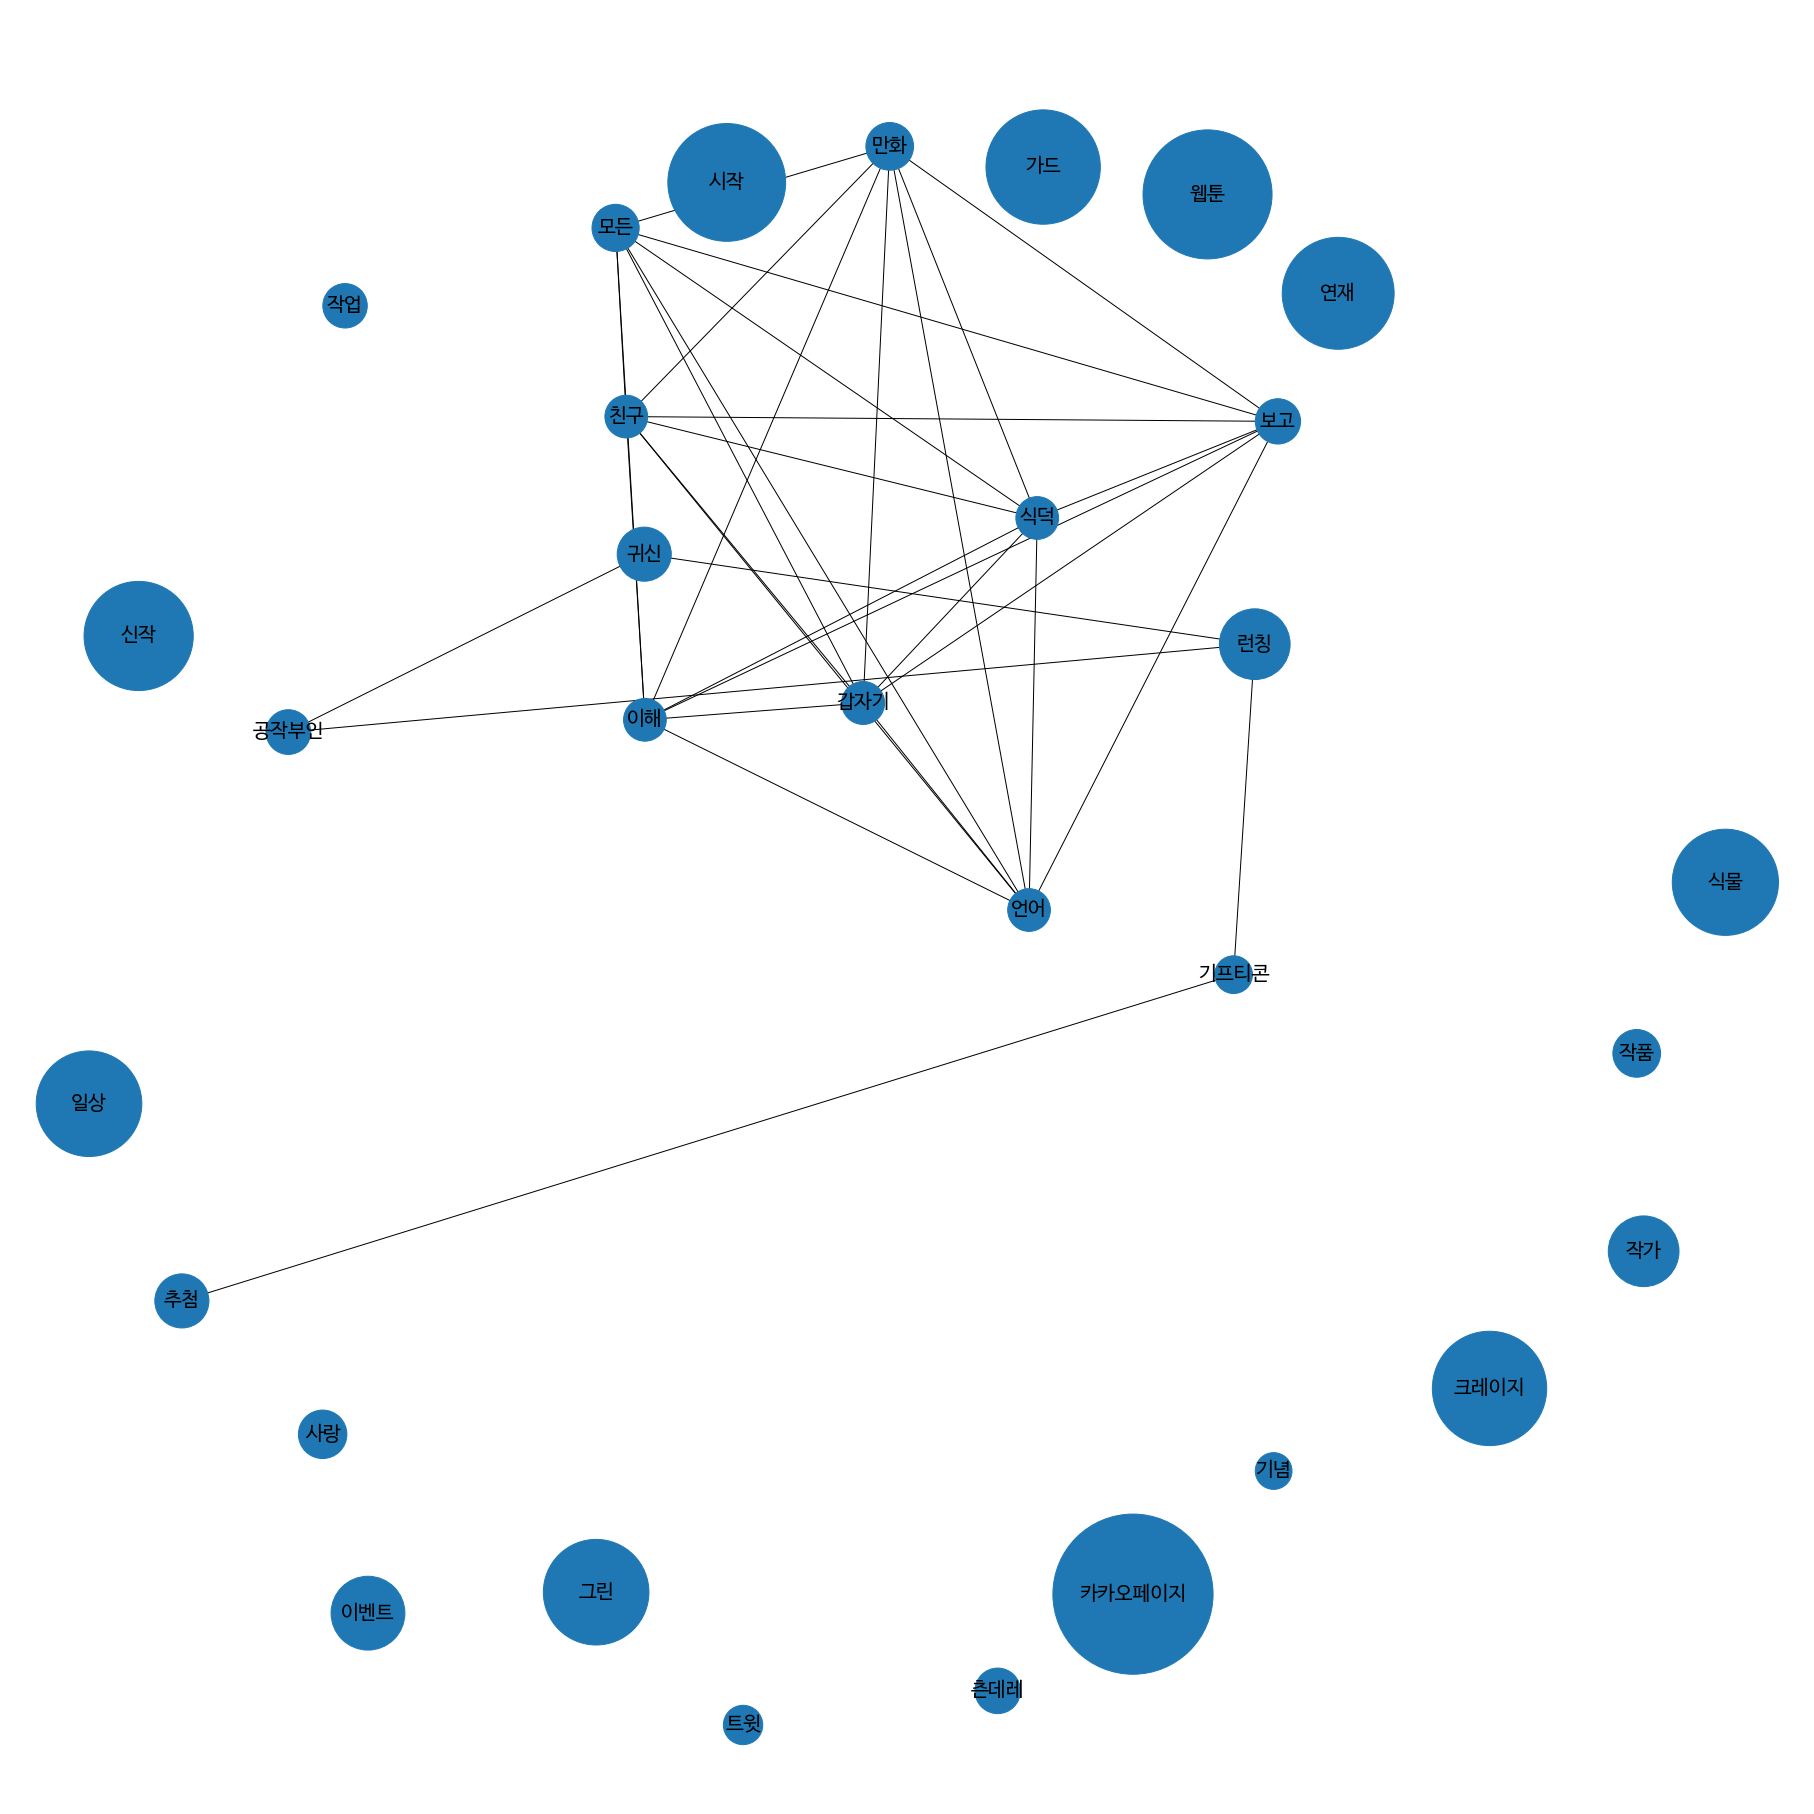

In [29]:
import networkx as nx
plt.figure(figsize=(25,25))
plt.rc('font', family='Malgun Gothic')

# networkx 그래프 객체를 생성합니다.
G = nx.Graph()

# node_df의 키워드 빈도수를 데이터로 하여, 네트워크 그래프의 ‘노드’ 역할을 하는 원을 생성합니다.
for index, row in node_df.iterrows():
    G.add_node(row['node'], nodesize=row['nodesize'])
    
# network_df의 연관 분석 데이터를 기반으로, 네트워크 그래프의 ‘관계’ 역할을 하는 선을 생성합니다.
for index, row in network_df.iterrows():
    G.add_weighted_edges_from([(row['source'], row['target'], row['support'])])
    
# 그래프 디자인과 관련된 파라미터를 설정합니다.
pos = nx.spring_layout(G, k=0.6, iterations=50)
sizes = [G.nodes[node]['nodesize']*25 for node in G]
nx.draw(G, pos=pos, node_size=sizes, font_family='NanumBarunGothic')

# Windows 사용자는 AppleGothic 대신,'Malgun Gothic'. 그 외 OS는 OS에서 한글을 지원하는 기본 폰트를 입력합니다.
nx.draw_networkx_labels(G, pos=pos,  font_family='NanumBarunGothic', font_size=20)

# 그래프를 출력합니다.
ax = plt.gca()
plt.show()